In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
import time
%matplotlib inline
import os
import xmitgcm

import xarray as xr

#from pyspec import spectrum as spec

#from aux_func import *
#import aux_func_3dfields as my


import os
from glob import glob
%matplotlib inline
from matplotlib.colors import LogNorm
import dask
from dask.diagnostics import ProgressBar
from xgcm import Grid

import matplotlib.patches as patches

In [2]:
plt.rcParams['figure.figsize'] = (9,7)

plt.rcParams.update({'font.size': 18
    , 'legend.markerscale': 1., 'axes.titlesize': 18, 'axes.labelsize' : 18,
      'legend.fontsize' : 18,'legend.handlelength': 3})

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'


lw=3
aph=.2

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1.e-3/np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')


In [3]:
def plus_minus_sd(arr):
    arr_m = np.mean(arr,axis=0)
    arr_sd = np.std(arr,axis=0)
    arr_l = arr_m - arr_sd
    arr_u = arr_m + arr_sd
    return (arr_m, arr_l, arr_u)

def plus_minus_sd2(arr):
    arr_m = np.log10(np.mean(arr,axis=0))
    arr_sd = np.std(np.log10(arr),axis=0)
    arr_l = arr_m - arr_sd
    arr_u = arr_m + arr_sd
    return (arr_m, arr_l, arr_u)

In [4]:
KE_spec_h = xr.open_dataset('/swot/SUM02/as4479/Power_Spectral_Flux_2/KE_spec_surf_10h.nc')
KE_spec_d = xr.open_dataset('/swot/SUM02/as4479/Power_Spectral_Flux_2/KE_spec_surf_d.nc')
KE_spec_w = xr.open_dataset('/swot/SUM02/as4479/Power_Spectral_Flux_2/KE_spec_surf_w.nc')

KE_spec_h_ACC = xr.open_dataset('/swot/SUM02/as4479/Power_Spectral_Flux_2/KE_spec_surf_10h_ACC.nc')
KE_spec_d_ACC = xr.open_dataset('/swot/SUM02/as4479/Power_Spectral_Flux_2/KE_spec_surf_d_ACC.nc')
KE_spec_w_ACC = xr.open_dataset('/swot/SUM02/as4479/Power_Spectral_Flux_2/KE_spec_surf_w_ACC.nc')


In [5]:
load_slab1 = ['agulhas_spectra_slab1.npz','agulhas_spectra_d_slab1.npz','agulhas_spectra_w_slab1.npz']
load_slab2 = ['agulhas_spectra_slab2.npz','agulhas_spectra_d_slab2.npz','agulhas_spectra_w_slab2.npz']
load_slab3 = ['agulhas_spectra_slab3.npz','agulhas_spectra_d_slab3.npz','agulhas_spectra_w_slab3.npz']

In [6]:
figdir = 'Fig_wn_spec_Agulhas/'

In [7]:
cases = ['hourly','daily','weekly']
colors1 = ['firebrick','red','coral'] #'coral'
colors2 = ['darkblue','royalblue','skyblue']
colors3 =['royalblue','red', 'green']
colors3 =['darkblue','darkred', 'darkgreen']
colors4 = [color2, color1, color3]

In [8]:
kh = KE_spec_h.E_iso_w.K.values
kd = KE_spec_d.E_iso_w.K.values
kw = KE_spec_w.E_iso_w.K.values
KE_h = KE_spec_h.E_iso_w.mean(dim='time').values
KE_d = KE_spec_d.E_iso_w.mean(dim='time').values
KE_w = KE_spec_w.E_iso_w.mean(dim='time').values


kh_ACC = KE_spec_h_ACC.E_iso_w.K.values
kd_ACC = KE_spec_d_ACC.E_iso_w.K.values
kw_ACC = KE_spec_w_ACC.E_iso_w.K.values
KE_h_ACC = KE_spec_h_ACC.E_iso_w.mean(dim='time').values
KE_d_ACC = KE_spec_d_ACC.E_iso_w.mean(dim='time').values
KE_w_ACC = KE_spec_w_ACC.E_iso_w.mean(dim='time').values


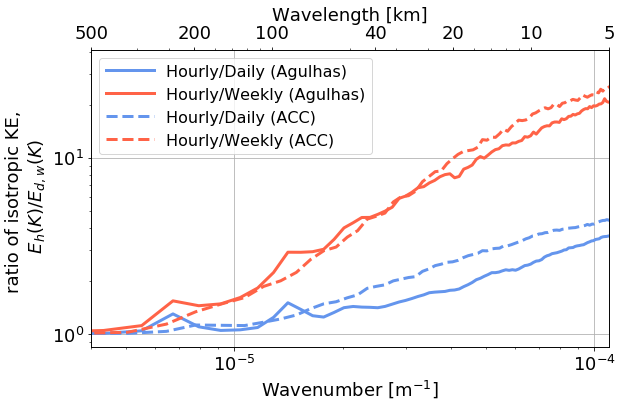

In [7]:
fig = plt.figure(facecolor='w', figsize=(9.,6.))
ax1 = fig.add_subplot(111)

ax1.plot(kh,KE_h/KE_d,color=color2,linewidth=3,
         label=r'Hourly/Daily (Agulhas) ')
ax1.plot(kh,KE_h/KE_w,color=color1,linewidth=3,
         label=r'Hourly/Weekly (Agulhas)')

ax1.plot(kh_ACC,KE_h_ACC/KE_d_ACC,color=color2,linewidth=3,linestyle='--',
         label=r'Hourly/Daily (ACC)')
ax1.plot(kh_ACC,KE_h_ACC/KE_w_ACC,color=color1,linewidth=3,linestyle='--',
         label=r'Hourly/Weekly (ACC)')


ax1.set_xlim([4.0e-6,1.1e-4])
#ax1.set_ylim([-4,8])

ax1.set_xscale('log', nonposx='mask')
ax1.set_yscale('log')
ax1.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax1.set_ylabel(u'ratio of isotropic KE, \n $E_{h}(K)/E_{d,w}(K)$')
add_second_axis(ax1)

lg = ax1.legend(loc=0, numpoints=1,ncol=1, fancybox=True, fontsize=16)
lg.draw_frame(True)
ax1.grid()
plt.tight_layout()

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


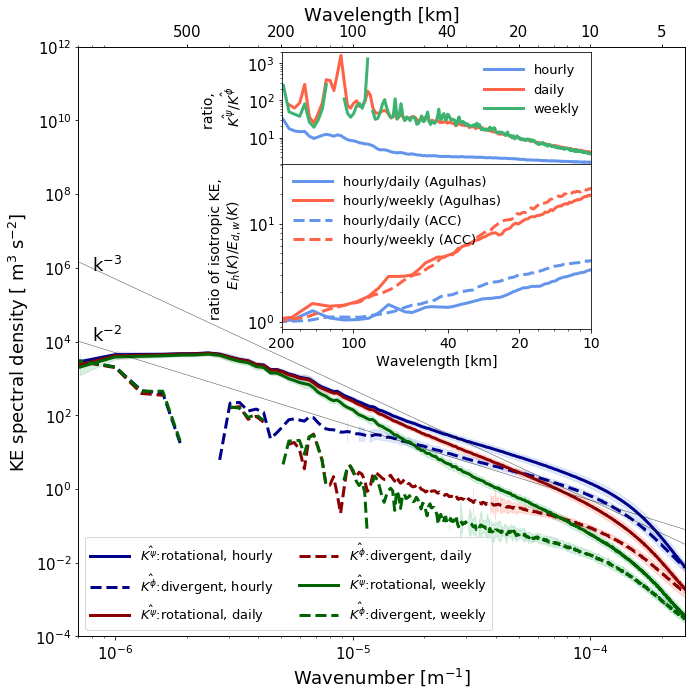

In [53]:
fig = plt.figure(facecolor='w', figsize=(10.,10))
ax1 = fig.add_subplot(111)
#left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
#ax3 = fig.add_axes([left, bottom, width, height])

#ax_ins = plt.axes([0, 0, 1, 1])
#ip = inset_axes(ax1, width="30%", # width = 30% of parent_bbox
#                    height=1.,)# bbox_to_anchor=[0.5, 0.1, 0.4, 0.2])
#ax_ins.set_axes_locator(ip)


left, bottom, width, height = [0.408, 0.755, 0.43, 0.155]
ax3 = fig.add_axes([left, bottom, width, height])


left1, bottom1, width1, height1 = [0.408, 0.525, 0.43, 0.23]
ax4 = fig.add_axes([left1, bottom1, width1, height1])


ks = np.array([2.e-7,1.e-3])
Es2 = .5e-8*(ks**(-2))
Es3 = 0.5e-12*(ks**(-3))


for i in range(3):
    slab1 = np.load(load_slab1[i])
    #slab2 = np.load(load_slab2[i])
    #slab3 = np.load(load_slab3[i])
    Eu, Eul, Euu = plus_minus_sd(slab1['Eu'])
    Ev, Evl, Evu = plus_minus_sd(slab1['Ev'])
    Kpsi, Kpsil, Kpsiu = plus_minus_sd2(slab1['Kpsi'])
    Kphi, Kphil, Kphiu = plus_minus_sd2(slab1['Kphi'])
    ku = slab1['ku'].mean(axis=0)
    kK = slab1['kK'].mean(axis=0)
    
    ax1.plot(kK,Kpsi,color=colors3[i],linewidth=lw,
               label=r'$\hat{K^{\psi}}$:rotational, %s' %cases[i])
    ax1.plot(kK,Kphi,color=colors3[i],linestyle='--', linewidth=lw,
               label=r'$\hat{K^{\phi}}$:divergent, %s' %cases[i])
    
    ax1.fill_between(kK,Kpsil,Kpsiu,
                 color=colors4[i], alpha=aph)


    ax1.fill_between(kK,Kphil,Kphiu,
                 color=colors4[i], alpha=aph)

    ax3.plot(kK,10.**Kpsi/10.**Kphi,color=colors4[i],linewidth=lw,
               label=r'%s' %cases[i])
    
ax1.plot(ks,np.log10(Es2),'-', color='k',linewidth=0.5,alpha=.7)
ax1.plot(ks,np.log10(Es3),'-', color='k',linewidth=0.5,alpha=.7)

ax1.set_xscale('log', nonposx='mask')
#ax1.set_yscale('log', nonposy='mask')

ax1.set_xlim([7.0e-7,2.5e-4])

ax1.set_ylim([-4,12])
tck = np.array([-4,-2,0,2,4,6,8,10,12])
tcklbl =['$10^{-4}$', '$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$','$10^{6}$','$10^{8}$','$10^{10}$','$10^{12}$', ]
ax1.set_yticks(tck)
ax1.set_yticklabels(tcklbl)


ax1.text(0.8e-6, 4.,u'k$^{-2}$')
ax1.text(0.8e-6, 5.9,u'k$^{-3}$')
lg = ax1.legend(loc=3, numpoints=1,ncol=2, fontsize='13')
lg.draw_frame(True)

lg2 = ax3.legend(loc=0, fontsize='13')
lg2.draw_frame(False)


ax3.set_xscale('log', nonposx='mask')
ax3.set_yscale('log', nonposy='mask')

ax3.set_ylabel(u'ratio, \n $\hat{K^{\psi}}/\hat{K^{\phi}}$', fontsize=14)
ax3.set_xlabel([])
ax3.set_xticks([])
#ax3.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
#ax3.set_xticklabels(np.array([200,100,40,20,10]))
#ax3.set_xlabel('Wavelength [km]')


ax3.set_xlim([5.0e-6,1.0e-4])
ax3.set_ylim([2.0e0,2.0e3])


ax4.plot(kh,KE_h/KE_d,color=color2,linewidth=3,
         label=r'hourly/daily (Agulhas) ')
ax4.plot(kh,KE_h/KE_w,color=color1,linewidth=3,
         label=r'hourly/weekly (Agulhas)')

ax4.plot(kh_ACC,KE_h_ACC/KE_d_ACC,color=color2,linewidth=3,linestyle='--',
         label=r'hourly/daily (ACC)')
ax4.plot(kh_ACC,KE_h_ACC/KE_w_ACC,color=color1,linewidth=3,linestyle='--',
         label=r'hourly/weekly (ACC)')

ax4.set_xscale('log', nonposx='mask')

ax4.set_xlim([5.0e-6,1.0e-4])
ax4.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
ax4.set_xticklabels(np.array([200,100,40,20,10]), fontsize=14)
ax4.set_xlabel('Wavelength [km]', fontsize=14)



ax4.set_yscale('log')
ax4.set_ylabel(u'ratio of isotropic KE, \n $E_{h}(K)/E_{d,w}(K)$', fontsize=14)

lg4 = ax4.legend(loc=0, numpoints=1,ncol=1, fancybox=True, fontsize=13)
lg4.draw_frame(False)


ax1.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax1.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]')


add_second_axis(ax1)

plt.tight_layout()

fig.savefig(figdir+'rot_div_wn_spec_surf_w_2_inset.pdf')

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


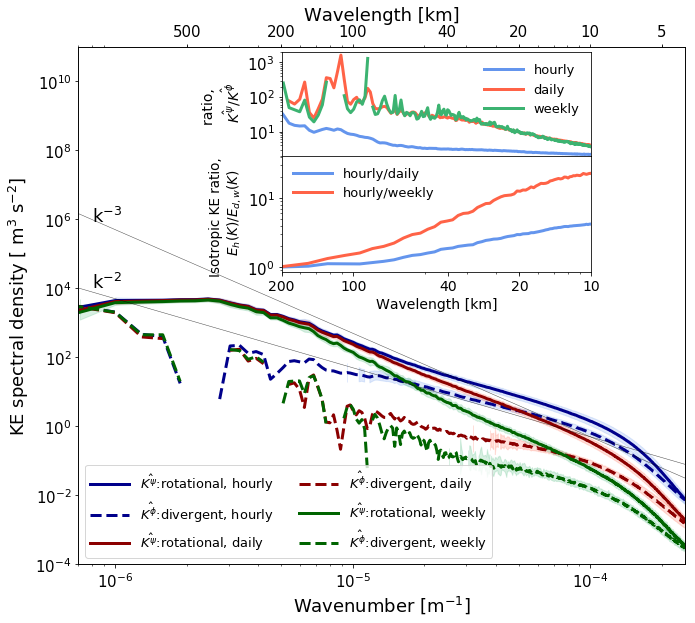

In [58]:
fig = plt.figure(facecolor='w', figsize=(10.,9))
ax1 = fig.add_subplot(111)
#left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
#ax3 = fig.add_axes([left, bottom, width, height])

#ax_ins = plt.axes([0, 0, 1, 1])
#ip = inset_axes(ax1, width="30%", # width = 30% of parent_bbox
#                    height=1.,)# bbox_to_anchor=[0.5, 0.1, 0.4, 0.2])
#ax_ins.set_axes_locator(ip)


left, bottom, width, height = [0.408, 0.74, 0.43, 0.16]
ax3 = fig.add_axes([left, bottom, width, height])


left1, bottom1, width1, height1 = [0.408, 0.56, 0.43, 0.18]
ax4 = fig.add_axes([left1, bottom1, width1, height1])


ks = np.array([2.e-7,1.e-3])
Es2 = .5e-8*(ks**(-2))
Es3 = 0.5e-12*(ks**(-3))


for i in range(3):
    slab1 = np.load(load_slab1[i])
    #slab2 = np.load(load_slab2[i])
    #slab3 = np.load(load_slab3[i])
    Eu, Eul, Euu = plus_minus_sd(slab1['Eu'])
    Ev, Evl, Evu = plus_minus_sd(slab1['Ev'])
    Kpsi, Kpsil, Kpsiu = plus_minus_sd2(slab1['Kpsi'])
    Kphi, Kphil, Kphiu = plus_minus_sd2(slab1['Kphi'])
    ku = slab1['ku'].mean(axis=0)
    kK = slab1['kK'].mean(axis=0)
    
    ax1.plot(kK,Kpsi,color=colors3[i],linewidth=lw,
               label=r'$\hat{K^{\psi}}$:rotational, %s' %cases[i])
    ax1.plot(kK,Kphi,color=colors3[i],linestyle='--', linewidth=lw,
               label=r'$\hat{K^{\phi}}$:divergent, %s' %cases[i])
    
    ax1.fill_between(kK,Kpsil,Kpsiu,
                 color=colors4[i], alpha=aph)


    ax1.fill_between(kK,Kphil,Kphiu,
                 color=colors4[i], alpha=aph)

    ax3.plot(kK,10.**Kpsi/10.**Kphi,color=colors4[i],linewidth=lw,
               label=r'%s' %cases[i])
    
ax1.plot(ks,np.log10(Es2),'-', color='k',linewidth=0.5,alpha=.7)
ax1.plot(ks,np.log10(Es3),'-', color='k',linewidth=0.5,alpha=.7)

ax1.set_xscale('log', nonposx='mask')
#ax1.set_yscale('log', nonposy='mask')

ax1.set_xlim([7.0e-7,2.5e-4])

ax1.set_ylim([-4,11])
tck = np.array([-4,-2,0,2,4,6,8,10])
tcklbl =['$10^{-4}$', '$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$','$10^{6}$','$10^{8}$','$10^{10}$' ]
ax1.set_yticks(tck)
ax1.set_yticklabels(tcklbl)


ax1.text(0.8e-6, 4.,u'k$^{-2}$')
ax1.text(0.8e-6, 5.9,u'k$^{-3}$')
lg = ax1.legend(loc=3, numpoints=1,ncol=2, fontsize='13')
lg.draw_frame(True)

lg2 = ax3.legend(loc=0, fontsize='13')
lg2.draw_frame(False)


ax3.set_xscale('log', nonposx='mask')
ax3.set_yscale('log', nonposy='mask')

ax3.set_ylabel(u'ratio, \n $\hat{K^{\psi}}/\hat{K^{\phi}}$', fontsize=14)
ax3.set_xlabel([])
ax3.set_xticks([])
#ax3.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
#ax3.set_xticklabels(np.array([200,100,40,20,10]))
#ax3.set_xlabel('Wavelength [km]')


ax3.set_xlim([5.0e-6,1.0e-4])
ax3.set_ylim([2.0e0,2.0e3])

ax4.plot(kh_ACC,KE_h_ACC/KE_d_ACC,color=color2,linewidth=3,
         label=r'hourly/daily')
ax4.plot(kh_ACC,KE_h_ACC/KE_w_ACC,color=color1,linewidth=3,
         label=r'hourly/weekly')

ax4.set_xscale('log', nonposx='mask')

ax4.set_xlim([5.0e-6,1.0e-4])
ax4.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
ax4.set_xticklabels(np.array([200,100,40,20,10]), fontsize=14)
ax4.set_xlabel('Wavelength [km]', fontsize=14)



ax4.set_yscale('log')
ax4.set_ylabel(u'Isotropic KE ratio, \n $E_{h}(K)/E_{d,w}(K)$', fontsize=13.5)

lg4 = ax4.legend(loc=0, numpoints=1,ncol=1, fancybox=True, fontsize=13)
lg4.draw_frame(False)


ax1.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax1.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]')


add_second_axis(ax1)

plt.tight_layout()

fig.savefig(figdir+'rot_div_wn_spec_surf_w_2_inset_only_ACC.pdf')

In [10]:
from matplotlib import gridspec

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


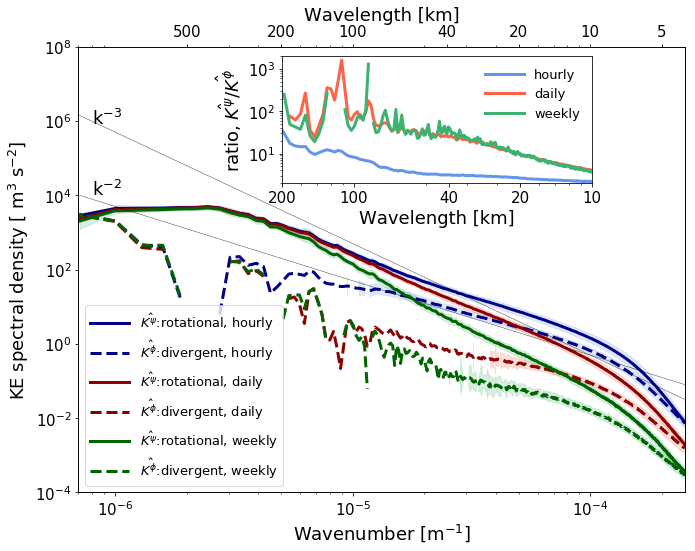

In [29]:
fig = plt.figure(facecolor='w', figsize=(10.,8.))



ax1 = fig.add_subplot(111)
#left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
#ax3 = fig.add_axes([left, bottom, width, height])

#ax_ins = plt.axes([0, 0, 1, 1])
#ip = inset_axes(ax1, width="30%", # width = 30% of parent_bbox
#                    height=1.,)# bbox_to_anchor=[0.5, 0.1, 0.4, 0.2])
#ax_ins.set_axes_locator(ip)


left, bottom, width, height = [0.409, 0.66, 0.43, 0.22]
ax3 = fig.add_axes([left, bottom, width, height])

ks = np.array([2.e-7,1.e-3])
Es2 = .5e-8*(ks**(-2))
Es3 = 0.5e-12*(ks**(-3))


for i in range(3):
    slab1 = np.load(load_slab1[i])
    #slab2 = np.load(load_slab2[i])
    #slab3 = np.load(load_slab3[i])
    Eu, Eul, Euu = plus_minus_sd(slab1['Eu'])
    Ev, Evl, Evu = plus_minus_sd(slab1['Ev'])
    Kpsi, Kpsil, Kpsiu = plus_minus_sd2(slab1['Kpsi'])
    Kphi, Kphil, Kphiu = plus_minus_sd2(slab1['Kphi'])
    ku = slab1['ku'].mean(axis=0)
    kK = slab1['kK'].mean(axis=0)
    
    ax1.plot(kK,Kpsi,color=colors3[i],linewidth=lw,
               label=r'$\hat{K^{\psi}}$:rotational, %s' %cases[i])
    ax1.plot(kK,Kphi,color=colors3[i],linestyle='--', linewidth=lw,
               label=r'$\hat{K^{\phi}}$:divergent, %s' %cases[i])
    
    ax1.fill_between(kK,Kpsil,Kpsiu,
                 color=colors4[i], alpha=aph)


    ax1.fill_between(kK,Kphil,Kphiu,
                 color=colors4[i], alpha=aph)

    ax3.plot(kK,10.**Kpsi/10.**Kphi,color=colors4[i],linewidth=lw,
               label=r'%s' %cases[i])
    
ax1.plot(ks,np.log10(Es2),'-', color='k',linewidth=0.5,alpha=.7)
ax1.plot(ks,np.log10(Es3),'-', color='k',linewidth=0.5,alpha=.7)

ax1.set_xscale('log', nonposx='mask')
#ax1.set_yscale('log', nonposy='mask')

ax1.set_xlim([7.0e-7,2.5e-4])

ax1.set_ylim([-4,8])
tck = np.array([-4,-2,0,2,4,6,8])
tcklbl =['$10^{-4}$', '$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$','$10^{6}$','$10^{8}$', ]
ax1.set_yticks(tck)
ax1.set_yticklabels(tcklbl)


ax1.text(0.8e-6, 4.,u'k$^{-2}$')
ax1.text(0.8e-6, 5.9,u'k$^{-3}$')
lg = ax1.legend(loc=3, numpoints=1,ncol=1, fontsize='13')
lg.draw_frame(True)

lg2 = ax3.legend(loc=0, fontsize='13')
lg2.draw_frame(False)


ax3.set_xscale('log', nonposx='mask')
ax3.set_yscale('log', nonposy='mask')

ax3.set_ylabel(r'ratio, $\hat{K^{\psi}}/\hat{K^{\phi}}$')

ax3.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
ax3.set_xticklabels(np.array([200,100,40,20,10]))
ax3.set_xlabel('Wavelength [km]')


ax3.set_xlim([5.0e-6,1.0e-4])
ax3.set_ylim([2.0e0,2.0e3])


ax1.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax1.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]')

#plt.text(1./5, 3., "d", size=35, rotation=0.)





#ax1.axis([6.0/1.0e7,2.5/1.0e4,1./1.0e3,2.0e5])
#ax1.set_ylim([1.0e-4,1.0e8])
#ax1.grid()
add_second_axis(ax1)

plt.tight_layout()

fig.savefig(figdir+'rot_div_wn_spec_surf_w_inset.pdf')

In [14]:
def add_second_axis2(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1.e-3/np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    #plt.xlabel('Wavelength [km]')


/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


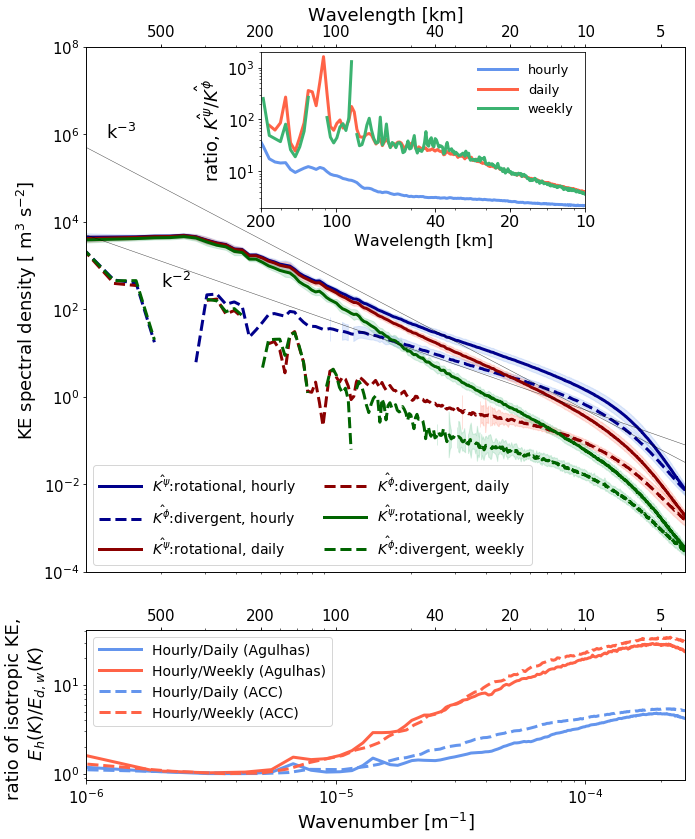

In [75]:
fig = plt.figure(facecolor='w', figsize=(10.,12.))


gs = gridspec.GridSpec(2, 1, height_ratios=[3.5, 1]) 
ax1 = plt.subplot(gs[0])

#left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
#ax3 = fig.add_axes([left, bottom, width, height])

#ax_ins = plt.axes([0, 0, 1, 1])
#ip = inset_axes(ax1, width="30%", # width = 30% of parent_bbox
#                    height=1.,)# bbox_to_anchor=[0.5, 0.1, 0.4, 0.2])
#ax_ins.set_axes_locator(ip)


left, bottom, width, height = [0.38, 0.745, 0.45, 0.18]
ax3 = fig.add_axes([left, bottom, width, height])

ks = np.array([2.e-7,1.e-3])
Es2 = .5e-8*(ks**(-2))
Es3 = 0.5e-12*(ks**(-3))


for i in range(3):
    slab1 = np.load(load_slab1[i])
    #slab2 = np.load(load_slab2[i])
    #slab3 = np.load(load_slab3[i])
    Eu, Eul, Euu = plus_minus_sd(slab1['Eu'])
    Ev, Evl, Evu = plus_minus_sd(slab1['Ev'])
    Kpsi, Kpsil, Kpsiu = plus_minus_sd2(slab1['Kpsi'])
    Kphi, Kphil, Kphiu = plus_minus_sd2(slab1['Kphi'])
    ku = slab1['ku'].mean(axis=0)
    kK = slab1['kK'].mean(axis=0)
    
    ax1.plot(kK,Kpsi,color=colors3[i],linewidth=lw,
               label=r'$\hat{K^{\psi}}$:rotational, %s' %cases[i])
    ax1.plot(kK,Kphi,color=colors3[i],linestyle='--', linewidth=lw,
               label=r'$\hat{K^{\phi}}$:divergent, %s' %cases[i])
    
    ax1.fill_between(kK,Kpsil,Kpsiu,
                 color=colors4[i], alpha=aph)


    ax1.fill_between(kK,Kphil,Kphiu,
                 color=colors4[i], alpha=aph)

    ax3.plot(kK,10.**Kpsi/10.**Kphi,color=colors4[i],linewidth=lw,
               label=r'%s' %cases[i])
    
ax1.plot(ks,np.log10(Es2),'-', color='k',linewidth=0.5,alpha=.7)
ax1.plot(ks,np.log10(Es3),'-', color='k',linewidth=0.5,alpha=.7)

ax1.set_xscale('log', nonposx='mask')
#ax1.set_yscale('log', nonposy='mask')

ax1.set_xlim([1.0e-6,2.5e-4])

ax1.set_ylim([-4,8])
tck = np.array([-4,-2,0,2,4,6,8])
tcklbl =['$10^{-4}$', '$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$','$10^{6}$','$10^{8}$', ]
ax1.set_yticks(tck)
ax1.set_yticklabels(tcklbl)
ax1.set_xticks([])


ax1.text(2.0e-6, 2.5,u'k$^{-2}$')
ax1.text(1.2e-6, 5.9,u'k$^{-3}$')
lg = ax1.legend(loc=3, numpoints=1,ncol=2, fontsize=14)
lg.draw_frame(True)

lg2 = ax3.legend(loc=0, fontsize='13')
lg2.draw_frame(False)


ax3.set_xscale('log', nonposx='mask')
ax3.set_yscale('log', nonposy='mask')

ax3.set_ylabel(r'ratio, $\hat{K^{\psi}}/\hat{K^{\phi}}$')

ax3.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
ax3.set_xticklabels(np.array([200,100,40,20,10]), fontsize=16)
ax3.set_xlabel('Wavelength [km]', fontsize=16)


ax3.set_xlim([5.0e-6,1.0e-4])
ax3.set_ylim([2.0e0,2.0e3])


#ax1.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax1.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]')

#plt.text(1./5, 3., "d", size=35, rotation=0.)





#ax1.axis([6.0/1.0e7,2.5/1.0e4,1./1.0e3,2.0e5])
#ax1.set_ylim([1.0e-4,1.0e8])
#ax1.grid()
add_second_axis(ax1)


ax4 = plt.subplot(gs[1])
ax4.plot(kh,KE_h/KE_d,color=color2,linewidth=3,
         label=r'Hourly/Daily (Agulhas) ')
ax4.plot(kh,KE_h/KE_w,color=color1,linewidth=3,
         label=r'Hourly/Weekly (Agulhas)')

ax4.plot(kh_ACC,KE_h_ACC/KE_d_ACC,color=color2,linewidth=3,linestyle='--',
         label=r'Hourly/Daily (ACC)')
ax4.plot(kh_ACC,KE_h_ACC/KE_w_ACC,color=color1,linewidth=3,linestyle='--',
         label=r'Hourly/Weekly (ACC)')


ax4.set_xlim([1.0e-6,2.5e-4])
#ax1.set_ylim([-4,8])

ax4.set_xscale('log', nonposx='mask')
ax4.set_yscale('log')
ax4.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax4.set_ylabel(u'ratio of isotropic KE, \n $E_{h}(K)/E_{d,w}(K)$')
add_second_axis2(ax4)

lg4 = ax4.legend(loc=0, numpoints=1,ncol=1, fancybox=True, fontsize=14)
lg4.draw_frame(True)
#ax4.grid()
plt.tight_layout()

fig.savefig(figdir+'rot_div_wn_spec_surf_w_subplot.pdf')

In [12]:
slabh = np.load(load_slab1[0])
slabd = np.load(load_slab1[1])
slabw = np.load(load_slab1[2])

Kpsi_h, Kpsil_h, Kpsiu_h = plus_minus_sd2(slabh['Kpsi'])
Kphi_h, Kphil_h, Kphiu_h = plus_minus_sd2(slabh['Kphi'])
kK_h = slabh['kK'].mean(axis=0)

Kpsi_d, Kpsil_d, Kpsiu_d = plus_minus_sd2(slabd['Kpsi'])
Kphi_d, Kphil_d, Kphiu_d = plus_minus_sd2(slabd['Kphi'])
kK_d = slabd['kK'].mean(axis=0)

Kpsi_w, Kpsil_w, Kpsiu_w = plus_minus_sd2(slabw['Kpsi'])
Kphi_w, Kphil_w, Kphiu_w = plus_minus_sd2(slabw['Kphi'])

kK_w = slabw['kK'].mean(axis=0)

/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/as4479/new_miniconda/miniconda/envs/pangeo/lib/python3.6/site-packages/matplotlib/scale.py:114: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


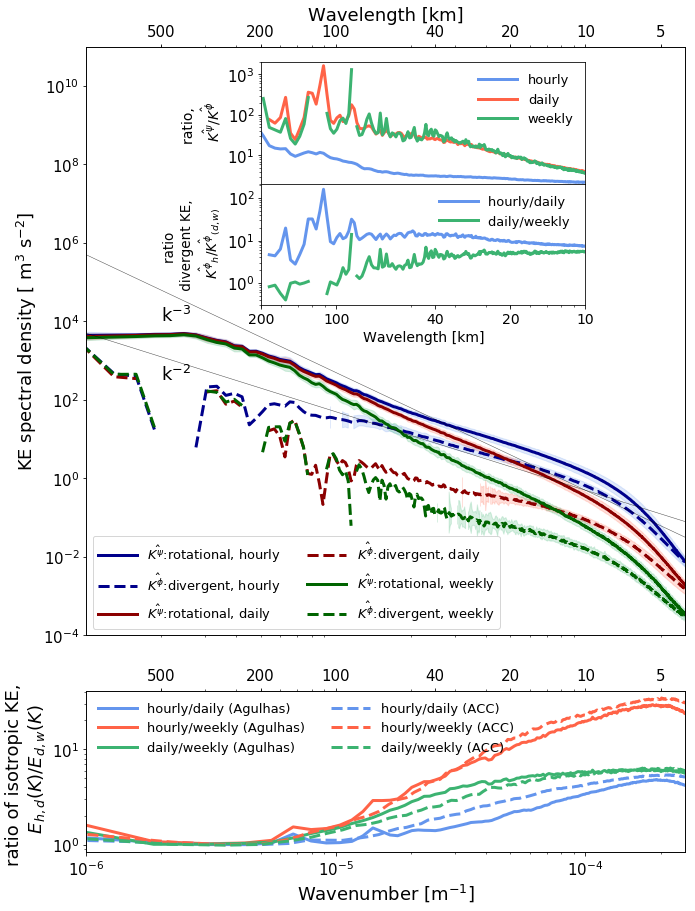

In [15]:
fig = plt.figure(facecolor='w', figsize=(10.,13))


gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1.1]) 
ax1 = plt.subplot(gs[0])


left, bottom, width, height = [0.38, 0.79, 0.45, 0.13]
ax3 = fig.add_axes([left, bottom, width, height])


left1, bottom1, width1, height1 = [0.38, 0.66, 0.45, 0.13]
ax4 = fig.add_axes([left1, bottom1, width1, height1])

ks = np.array([2.e-7,1.e-3])
Es2 = .5e-8*(ks**(-2))
Es3 = 0.5e-12*(ks**(-3))


ax1.plot(kK_h,Kpsi_h,color=colors3[0],linewidth=lw,
               label=r'$\hat{K^{\psi}}$:rotational, %s' %cases[0])
ax1.plot(kK_h,Kphi_h,color=colors3[0],linestyle='--', linewidth=lw,
               label=r'$\hat{K^{\phi}}$:divergent, %s' %cases[0])    
ax1.fill_between(kK_h,Kpsil_h,Kpsiu_h,
                 color=colors4[0], alpha=aph)
ax1.fill_between(kK_h,Kphil_h,Kphiu_h,
                 color=colors4[0], alpha=aph)

ax3.plot(kK_h,10.**Kpsi_h/10.**Kphi_h,color=colors4[0],linewidth=lw,
               label=r'%s' %cases[0])

ax1.plot(kK_d,Kpsi_d,color=colors3[1],linewidth=lw,
               label=r'$\hat{K^{\psi}}$:rotational, %s' %cases[1])
ax1.plot(kK_d,Kphi_d,color=colors3[1],linestyle='--', linewidth=lw,
               label=r'$\hat{K^{\phi}}$:divergent, %s' %cases[1])
ax1.fill_between(kK_d,Kpsil_d,Kpsiu_d,
                 color=colors4[1], alpha=aph)
ax1.fill_between(kK_d,Kphil_d,Kphiu_d,
                 color=colors4[1], alpha=aph)

ax3.plot(kK_d,10.**Kpsi_d/10.**Kphi_d,color=colors4[1],linewidth=lw,
               label=r'%s' %cases[1])

ax1.plot(kK_w,Kpsi_w,color=colors3[2],linewidth=lw,
               label=r'$\hat{K^{\psi}}$:rotational, %s' %cases[2])
ax1.plot(kK_w,Kphi_w,color=colors3[2],linestyle='--', linewidth=lw,
               label=r'$\hat{K^{\phi}}$:divergent, %s' %cases[2])
ax1.fill_between(kK_w,Kpsil_w,Kpsiu_w,
                 color=colors4[2], alpha=aph)
ax1.fill_between(kK_w,Kphil_w,Kphiu_w,
                 color=colors4[2], alpha=aph)

ax3.plot(kK_w,10.**Kpsi_w/10.**Kphi_w,color=colors4[2],linewidth=lw,
               label=r'%s' %cases[2])

ax1.plot(ks,np.log10(Es2),'-', color='k',linewidth=0.5,alpha=.7)
ax1.plot(ks,np.log10(Es3),'-', color='k',linewidth=0.5,alpha=.7)

ax1.set_xscale('log', nonposx='mask')
#ax1.set_yscale('log', nonposy='mask')

ax1.set_xlim([1.0e-6,2.5e-4])
#ax1.set_xlim([7.0e-7,2.5e-4])

ax1.set_ylim([-4,11])
tck = np.array([-4,-2,0,2,4,6,8,10])
tcklbl =['$10^{-4}$', '$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$','$10^{6}$','$10^{8}$','$10^{10}$' ]
ax1.set_yticks(tck)
ax1.set_yticklabels(tcklbl)


ax1.text(2.0e-6, 4.,u'k$^{-3}$')
ax1.text(2.0e-6, 2.5,u'k$^{-2}$')
lg = ax1.legend(loc=3, numpoints=1,ncol=2, fontsize='13')
lg.draw_frame(True)

lg2 = ax3.legend(loc=0, fontsize='13')
lg2.draw_frame(False)


ax3.set_xscale('log', nonposx='mask')
ax3.set_yscale('log', nonposy='mask')

ax3.set_ylabel(u'ratio, \n $\hat{K^{\psi}}/\hat{K^{\phi}}$', fontsize=14)
ax3.set_xlabel([])
ax3.set_xticks([])
#ax3.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
#ax3.set_xticklabels(np.array([200,100,40,20,10]))
#ax3.set_xlabel('Wavelength [km]')


ax3.set_xlim([5.0e-6,1.0e-4])
ax3.set_ylim([2.0e0,2.0e3])

ax4.plot(kK_h,10.**Kphi_h/10.**Kphi_d,color=color2,linewidth=3, #linestyle='--',
         label=r'hourly/daily ')
#ax4.plot(kK_h,10.**Kphi_h/10.**Kphi_w,color=color1,linewidth=3, #linestyle='--',
#         label=r'hourly/weekly $\hat{K^{\phi}}$')
ax4.plot(kK_h,10.**Kphi_d/10.**Kphi_w,color=color3,linewidth=3, #linestyle='--',
         label=r'daily/weekly ')

#ax4.plot(kK_h,10.**Kpsi_h/10.**Kpsi_d,color=color2,linewidth=3,
#         label=r'hourly/daily $\hat{K^{\psi}}$')
#ax4.plot(kK_h,10.**Kphi_h/10.**Kphi_w,color=color1,linewidth=3,
#         label=r'hourly/weekly $\hat{K^{\psi}}$')

ax4.set_xscale('log', nonposx='mask')
ax4.set_xscale('log', nonposx='mask')

ax4.set_xlim([5.0e-6,1.0e-4])
#ax4.set_ylim([2.0e-0,8.0e2])
ax4.set_xticks(1.e-3/np.array([200.,100.,40.,20.,10.]))
ax4.set_xticklabels(np.array([200,100,40,20,10]), fontsize=14)
ax4.set_xlabel('Wavelength [km]', fontsize=14)



ax4.set_yscale('log')
ax4.set_ylabel(u'ratio \n divergent KE, \n $\hat{K^{\phi}}_h/\hat{K^{\phi}}_{(d,w)}$', fontsize=13.5)

lg4 = ax4.legend(loc='upper right', numpoints=1,ncol=1, fancybox=True, fontsize=13)
lg4.draw_frame(False)


#ax1.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax1.set_ylabel(u'KE spectral density [ m$^{3}$ s$^{-2}$]')
ax1.set_xticks([])

add_second_axis(ax1)



ax5 = plt.subplot(gs[1])
ax5.plot(kh,KE_h/KE_d,color=color2,linewidth=3,
         label=r'hourly/daily (Agulhas) ')
ax5.plot(kh,KE_h/KE_w,color=color1,linewidth=3,
         label=r'hourly/weekly (Agulhas)')
ax5.plot(kh,KE_d/KE_w,color=color3,linewidth=3,
         label=r'daily/weekly (Agulhas)')

ax5.plot(kh_ACC,KE_h_ACC/KE_d_ACC,color=color2,linewidth=3,linestyle='--',
         label=r'hourly/daily (ACC)')
ax5.plot(kh_ACC,KE_h_ACC/KE_w_ACC,color=color1,linewidth=3,linestyle='--',
         label=r'hourly/weekly (ACC)')
ax5.plot(kh_ACC,KE_d_ACC/KE_w_ACC,color=color3,linewidth=3,linestyle='--',
         label=r'daily/weekly (ACC)')


ax5.set_xlim([1.0e-6,2.5e-4])
#ax1.set_ylim([-4,8])

ax5.set_xscale('log', nonposx='mask')
ax5.set_yscale('log')
ax5.set_xlabel(u'Wavenumber [m$^{-1}$]')
ax5.set_ylabel(u'ratio of isotropic KE, \n $E_{h,d}(K)/E_{d,w}(K)$')
add_second_axis2(ax5)

lg5 = ax5.legend(loc=0, numpoints=1,ncol=2, fancybox=True, fontsize=13)
lg5.draw_frame(False)

plt.tight_layout()

fig.savefig(figdir+'rot_div_wn_spec_surf_w_2_inset_subplot.pdf')